In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from heartpy import filter_signal
import os

In [ ]:
for i in range(1,101):
    os.makedirs('DownSampling/{}'.format(i))

# 다운샘플링
195번째마다 데이터 가져오기

In [ ]:
def down(a,b):
    df = pd.read_csv("심전도DB/{}/{}.csv".format(a,b),header=None)

    length = int(len(df)/195) + 1
    d =[]
    
    for i in range(length): 
        d.append(df[1][i*195])
        
    d = pd.Series(d)
    d.to_csv('DownSampling/{}/{}.csv'.format(a,b), header=False)

In [ ]:
# 1차 : i - (1,87), j-(1,51) / 2차 : i - (86,101), j-(1,61)
for i in range(1,101):
    for j in range(1,61):
        down(i,j)

In [ ]:
df = pd.read_csv("심전도DB/86/51.csv",header=None)

length = int(len(df)/195)
d =[]
for i in range(length): 
    d.append(df[1][i*195])
    
d = pd.Series(d)
d.to_csv('DownSampling/86/51.csv', header=False)

In [ ]:
for i in range(86,87):
    for j in range(52,61):
        down(i,j)

## 저장한 데이터 불러오기

In [ ]:
dff = pd.read_csv("d.csv",header=None)

# bandpass

In [ ]:
for i in range(1,101):
    os.makedirs('BandPass/{}'.format(i))

In [93]:
for a in range(1,101):
    dff = pd.DataFrame()
    
    for i in range(1,61):
        df = pd.read_csv('DownSampling/{}/{}.csv'.format(a,i), header=None)
         
        bp = filter_signal(df[1], cutoff=[0.5,40], sample_rate=500, order=5, filtertype='bandpass')
        dff[i] =  pd.DataFrame(bp, columns=[i])
        
        #f = pd.concat([dff,ff],axis=1)
    
           
    dff.to_csv('BandPass/{}/{}_band.csv'.format(a,a), index=False)

In [127]:
df = pd.read_csv("BandPass/1/1_band.csv")
df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.031820,0.053295,0.336647,0.019357,0.025467,0.118166,-0.081745,-0.030034,-0.040423,-0.031541,...,-0.028101,0.247611,-0.004346,-0.028294,0.000983,0.247611,-0.027723,0.103491,-0.042760,-0.030034
1,-0.015874,0.053439,0.334318,0.035324,0.018108,0.118038,-0.065642,-0.039541,-0.063111,-0.048600,...,-0.006048,0.262282,0.003161,-0.021110,0.023387,0.262282,-0.002410,0.101136,-0.041446,-0.039541
2,-0.001172,0.055066,0.331408,0.050004,0.011329,0.117026,-0.051662,-0.029766,-0.084121,-0.064172,...,0.014932,0.275090,0.010166,-0.019619,0.043725,0.275090,0.020307,0.099643,-0.040146,-0.029766
3,0.011249,0.059409,0.327274,0.062395,0.005608,0.114585,-0.041457,0.013845,-0.102012,-0.077056,...,0.033466,0.284387,0.016282,-0.028078,0.060330,0.284387,0.038340,0.099689,-0.038882,0.013845
4,0.020713,0.067278,0.321451,0.071940,0.001240,0.110682,-0.035859,0.097482,-0.115788,-0.086558,...,0.047700,0.289137,0.021258,-0.048072,0.072207,0.289137,0.050464,0.101636,-0.037677,0.097482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0.253090,0.237366,-0.117064,-0.060774,0.035995,-0.164822,0.249094,-0.196641,-0.787027,-0.045251,...,0.277540,-0.061911,-0.010468,-0.079244,0.423895,-0.061911,0.254268,-0.030907,-0.006005,-0.196641
2561,0.233023,0.198265,-0.105695,-0.057830,0.058988,-0.180778,0.250358,-0.176448,-0.664114,-0.044454,...,0.248423,-0.058111,-0.016289,-0.070796,0.373640,-0.058111,0.228750,-0.027598,-0.009668,-0.176448
2562,0.149139,0.156993,-0.091421,-0.057654,0.089659,-0.149849,0.246468,-0.149482,-0.532407,-0.042534,...,0.169996,-0.053697,-0.026091,-0.058164,0.260541,-0.053697,0.203843,-0.023276,-0.017384,-0.149482
2563,0.015054,0.114319,-0.074944,-0.059731,0.126341,-0.083158,0.238374,-0.117161,-0.395958,-0.039641,...,0.052906,-0.048768,-0.038989,-0.042154,0.098667,-0.048768,0.179372,-0.018183,-0.028251,-0.117161


# highpass

In [113]:
for i in range(1,101):
    os.makedirs('HighPass/{}'.format(i))

In [96]:
for a in range(1,101):
    dff = pd.DataFrame()
    
    for i in range(1,61):
        df = pd.read_csv('DownSampling/{}/{}.csv'.format(a,i), header=None)
         
        bp = filter_signal(df[1], cutoff = 0.5, sample_rate = 500, order = 5, filtertype='highpass')
        dff[i] =  pd.DataFrame(bp, columns=[i])
        
    
    dff.to_csv('HighPass/{}/{}_high.csv'.format(a,a), index=False)

In [97]:
df = pd.read_csv("HighPass/1/1_high.csv")
df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.011566,0.164484,0.019058,-0.062241,-0.034969,0.001925,-0.058840,-0.020978,-0.134145,-0.076865,...,0.132263,-0.007753,-0.004122,0.367286,-0.045842,-0.007753,-0.051520,0.063215,-0.060486,-0.020978
1,0.077466,0.137004,0.062279,-0.009529,-0.119724,0.076201,0.030041,-0.023029,-0.255903,-0.149012,...,0.151393,0.082317,0.082833,0.332756,0.022304,0.082317,-0.008463,0.072446,-0.082764,-0.023029
2,0.083038,0.165505,0.016261,0.035543,-0.103898,0.028626,0.068613,-0.097860,-0.193271,-0.203250,...,0.202284,0.082157,0.073559,0.280037,0.055810,0.082157,0.062903,0.085498,-0.051642,-0.097860
3,0.015121,0.176745,-0.059196,0.028975,-0.015833,-0.074197,-0.054316,-0.162222,-0.122860,-0.118127,...,0.186905,-0.029962,-0.029355,0.329008,0.034717,-0.029962,0.050569,0.018719,-0.062271,-0.162222
4,-0.024216,0.186086,-0.027693,-0.076903,0.018892,-0.049511,-0.063565,-0.038213,-0.185149,-0.046175,...,0.119837,0.024208,-0.034609,0.376010,-0.010086,0.024208,-0.015046,0.013400,-0.075659,-0.038213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0.258704,0.308602,-0.106247,-0.046063,-0.023487,-0.130622,0.089754,-0.135883,-0.794207,0.005813,...,0.250823,-0.084491,-0.043041,-0.046256,0.366779,-0.084491,0.319092,-0.006976,-0.059582,-0.135883
2561,0.283942,0.260682,-0.082044,-0.095399,-0.114389,-0.135350,0.132857,-0.234523,-0.681261,-0.054362,...,0.287204,-0.078921,0.004847,-0.081007,0.397346,-0.078921,0.376441,-0.011014,-0.009510,-0.234523
2562,0.137939,0.270643,-0.169854,0.010532,-0.052171,-0.232077,0.241392,-0.290681,-0.560472,-0.013683,...,0.268245,-0.091231,0.073367,-0.139548,0.302812,-0.091231,0.340651,-0.061580,-0.005778,-0.290681
2563,-0.040824,0.261684,-0.184030,0.086199,0.052727,-0.194434,0.173052,-0.203860,-0.438441,0.058353,...,0.144224,-0.122550,0.047599,-0.097148,0.115315,-0.122550,0.239700,-0.101954,-0.043387,-0.203860


# lowpass

In [119]:
for i in range(1,101):
    os.makedirs('LowPass/{}'.format(i))

In [98]:
for a in range(1,101):
    dff = pd.DataFrame()
    
    for i in range(1,61):
        df = pd.read_csv('DownSampling/{}/{}.csv'.format(a,i), header=None)
         
        bp = filter_signal(df[1], cutoff = 40, sample_rate = 500, order = 5, filtertype='lowpass')
        dff[i] =  pd.DataFrame(bp, columns=[i])
        
    
    dff.to_csv('LowPass/{}/{}_low.csv'.format(a,a), index=False)

In [105]:
df = pd.read_csv('LowPass/1/1_low.csv')
df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,1.697478,1.889883,1.800877,1.651337,1.727794,1.743817,1.526014,1.734838,1.578723,1.577936,...,1.672828,1.717496,1.729346,1.751857,1.639704,1.717496,1.481414,1.770965,1.594431,1.734838
1,1.713703,1.889929,1.798704,1.667958,1.720837,1.744243,1.542729,1.725740,1.556597,1.561602,...,1.695223,1.733334,1.736960,1.755635,1.662630,1.733334,1.507543,1.769004,1.596291,1.725740
2,1.728594,1.891485,1.795997,1.683436,1.714521,1.742842,1.557189,1.735845,1.536391,1.546737,...,1.717659,1.747479,1.744159,1.754191,1.683545,1.747479,1.531054,1.767817,1.598149,1.735845
3,1.741144,1.895719,1.792396,1.696696,1.709266,1.739584,1.567817,1.779661,1.519413,1.534514,...,1.738183,1.758219,1.750511,1.743839,1.700773,1.758219,1.549872,1.768121,1.599970,1.779661
4,1.750717,1.903396,1.787594,1.707117,1.705322,1.734902,1.573855,1.863350,1.506532,1.525609,...,1.754415,1.764451,1.755728,1.723210,1.713304,1.764451,1.562786,1.770317,1.601718,1.863350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2.586912,1.967056,1.921500,1.940915,1.563744,1.676736,1.561062,1.911162,2.086933,1.655727,...,2.352107,1.843134,1.669299,1.711692,2.522649,1.843134,1.695192,1.737037,1.637715,1.911162
2561,2.577780,1.926387,1.937669,1.948261,1.579033,1.665374,1.550854,1.937484,2.234121,1.656188,...,2.329050,1.849597,1.661784,1.721565,2.478387,1.849597,1.663170,1.741559,1.631182,1.937484
2562,2.506281,1.883325,1.956696,1.952787,1.602049,1.697646,1.535879,1.970513,2.390602,1.657742,...,2.257603,1.856602,1.650248,1.735636,2.372371,1.856602,1.632066,1.747111,1.620550,1.970513
2563,2.386397,1.838627,1.977899,1.955051,1.631135,1.761569,1.517058,2.008897,2.551904,1.660277,...,2.148732,1.864099,1.635642,1.753135,2.219254,1.864099,1.601479,1.753433,1.606734,2.008897


# 데이터 분할

bandpass

In [101]:
for k in range(1,101):
    df = pd.read_csv("BandPass/{}/{}_band.csv".format(k,k))
    for j in range(1,61):
        index=str(j)
        if index in df.columns:
            os.makedirs('dataDivision/band/{}/{}'.format(k,j), exist_ok=True)
            for i in range (0,6):
                num=256*i
                a=df.truncate(before=num, after=num+255, axis=0)
                b=a[index]
                b.to_csv('dataDivision/band/{}/{}/{}.csv'.format(k,j,i+1), index=False, header=False)

highpass

In [102]:
for k in range(1,101):
    df = pd.read_csv('HighPass/{}/{}_high.csv'.format(k,k))
    for j in range(1,61):
        index=str(j)
        if index in df.columns:
            os.makedirs('dataDivision/high/{}/{}'.format(k,j), exist_ok=True)
            for i in range (0,6):
                num=256*i
                a=df.truncate(before=num, after=num+255, axis=0)
                b=a[index]
                b.to_csv('dataDivision/high/{}/{}/{}.csv'.format(k,j,i+1), index=False, header=False)

lowpass

In [106]:
for k in range(1,101):
    df = pd.read_csv('LowPass/{}/{}_low.csv'.format(k,k))
    for j in range(1,61):
        index=str(j)
        if index in df.columns:
            #os.makedirs('dataDivision/low/{}/{}'.format(k,j), exist_ok=True)
            for i in range (0,6):
                num=256*i
                a=df.truncate(before=num, after=num+255, axis=0)
                b=a[index]
                b.to_csv('dataDivision/low/{}/{}/{}.csv'.format(k,j,i+1), index=False, header=False)

# 최종 전체 시각화 (1번 사람 1번 파일)

원본

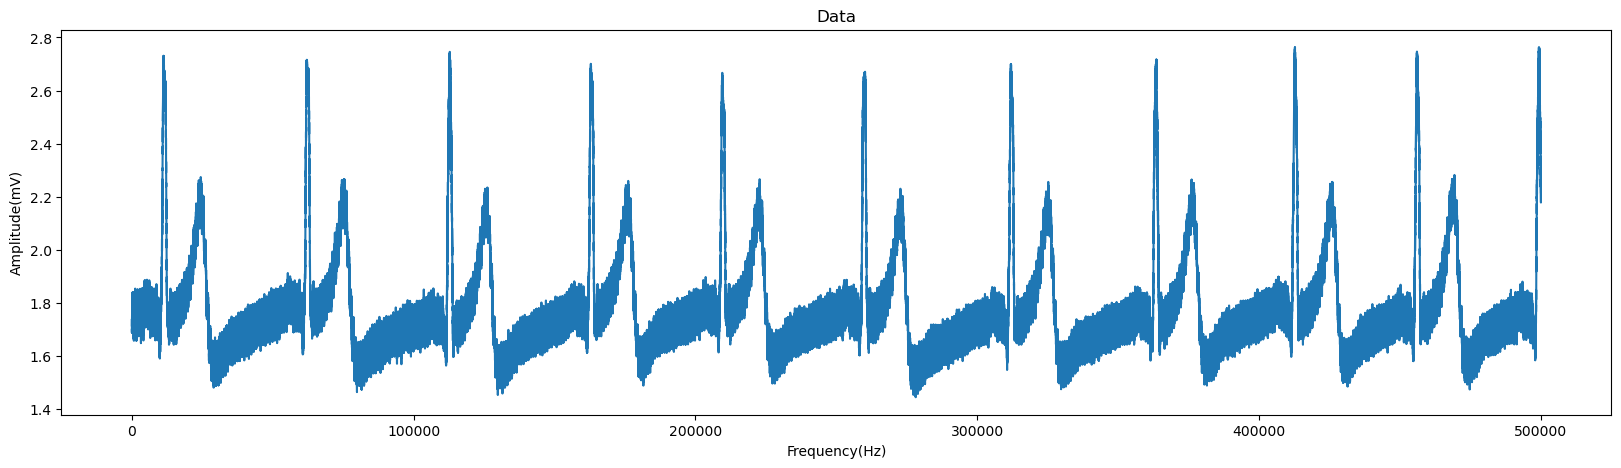

In [106]:
origin = pd.read_csv("심전도DB/1/1.csv",header=None)

plt.figure(figsize=(20,5))
origin[1].plot()

plt.title('Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

다운샘플링

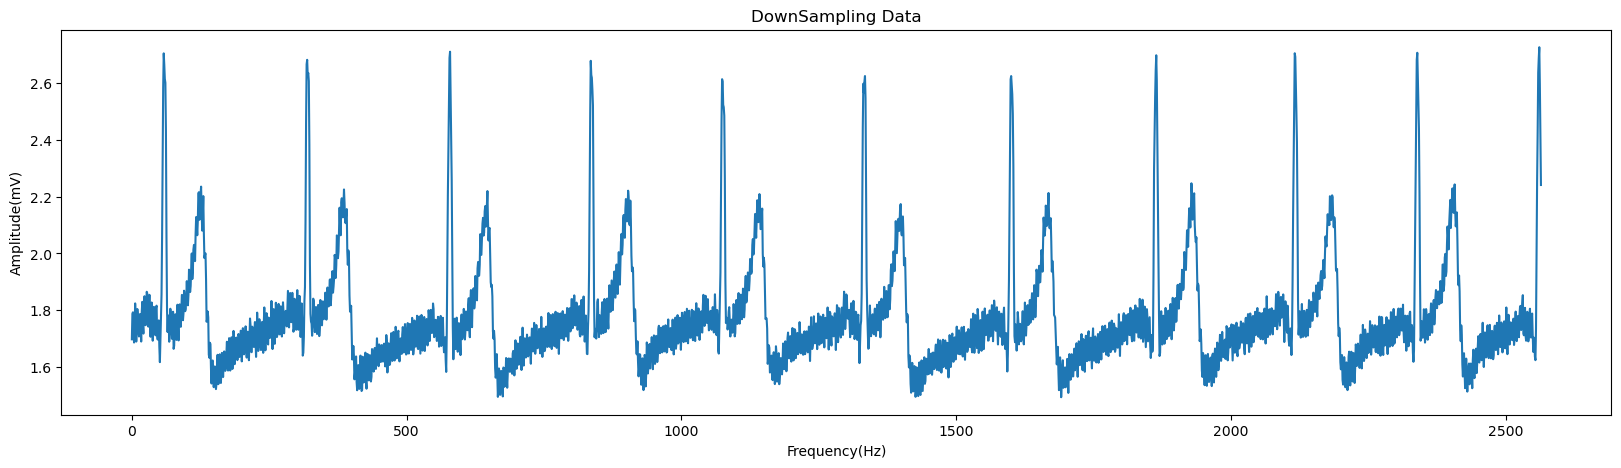

In [107]:
down = pd.read_csv("DownSampling/1/1.csv",header=None)

plt.figure(figsize=(20,5))

down[1].plot()

plt.title('DownSampling Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

bandpass

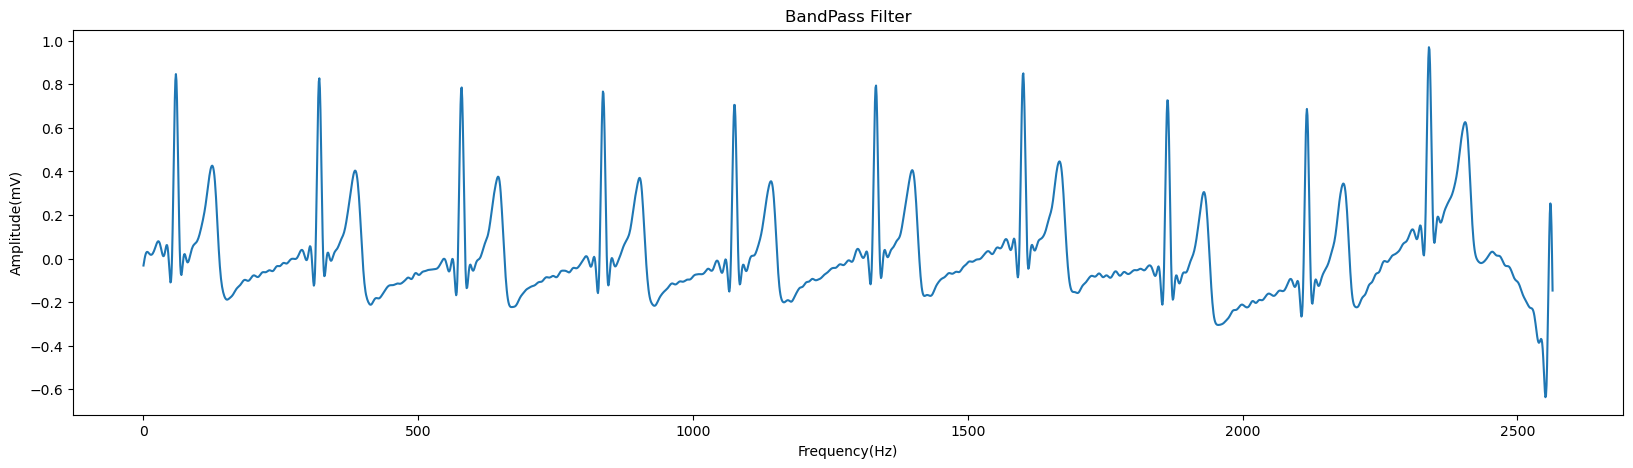

In [118]:
bandpass = pd.read_csv("BandPass/1/1_band.csv")

plt.figure(figsize=(20,5))

bandpass['1'].plot()

plt.title('BandPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

highpass

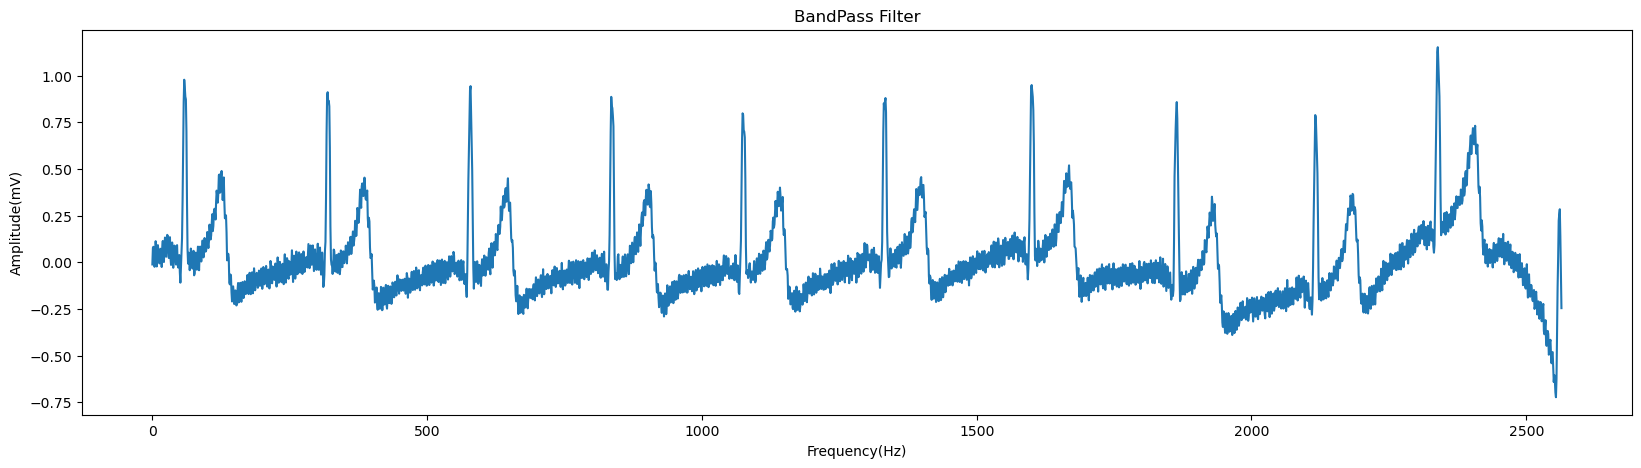

In [114]:
highpass = pd.read_csv("HighPass/1/1_high.csv")

plt.figure(figsize=(20,5))

highpass['1'].plot()

plt.title('BandPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

lowpass

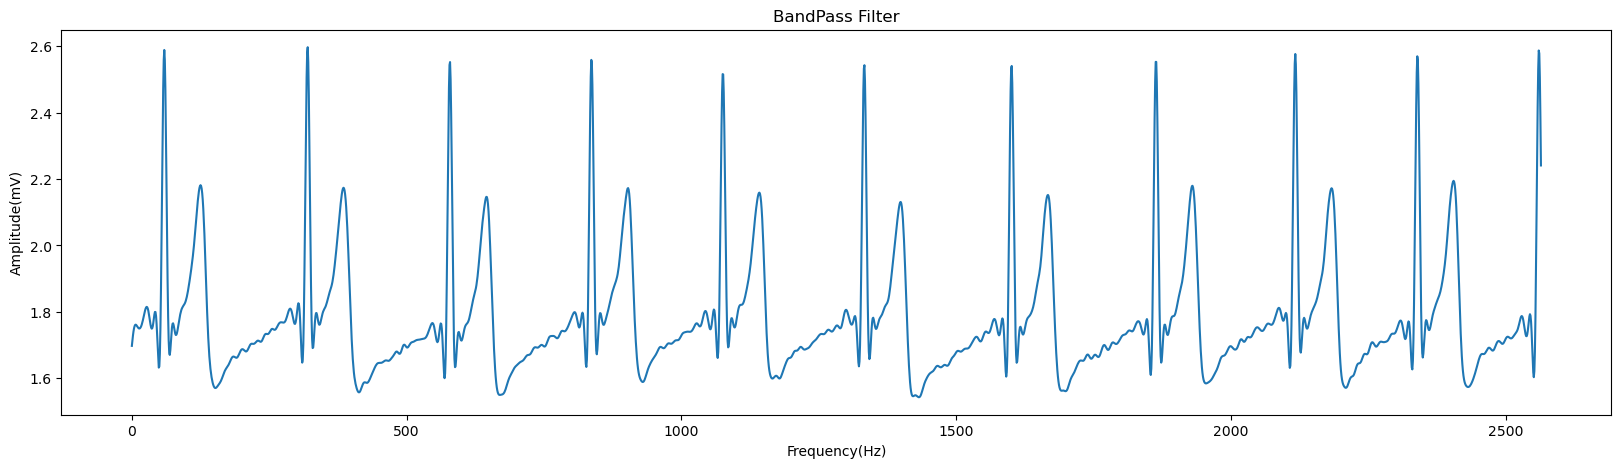

In [122]:
lowpass = pd.read_csv('LowPass/1/1_low.csv')

plt.figure(figsize=(20,5))

lowpass['1'].plot()

plt.title('BandPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

# 비교

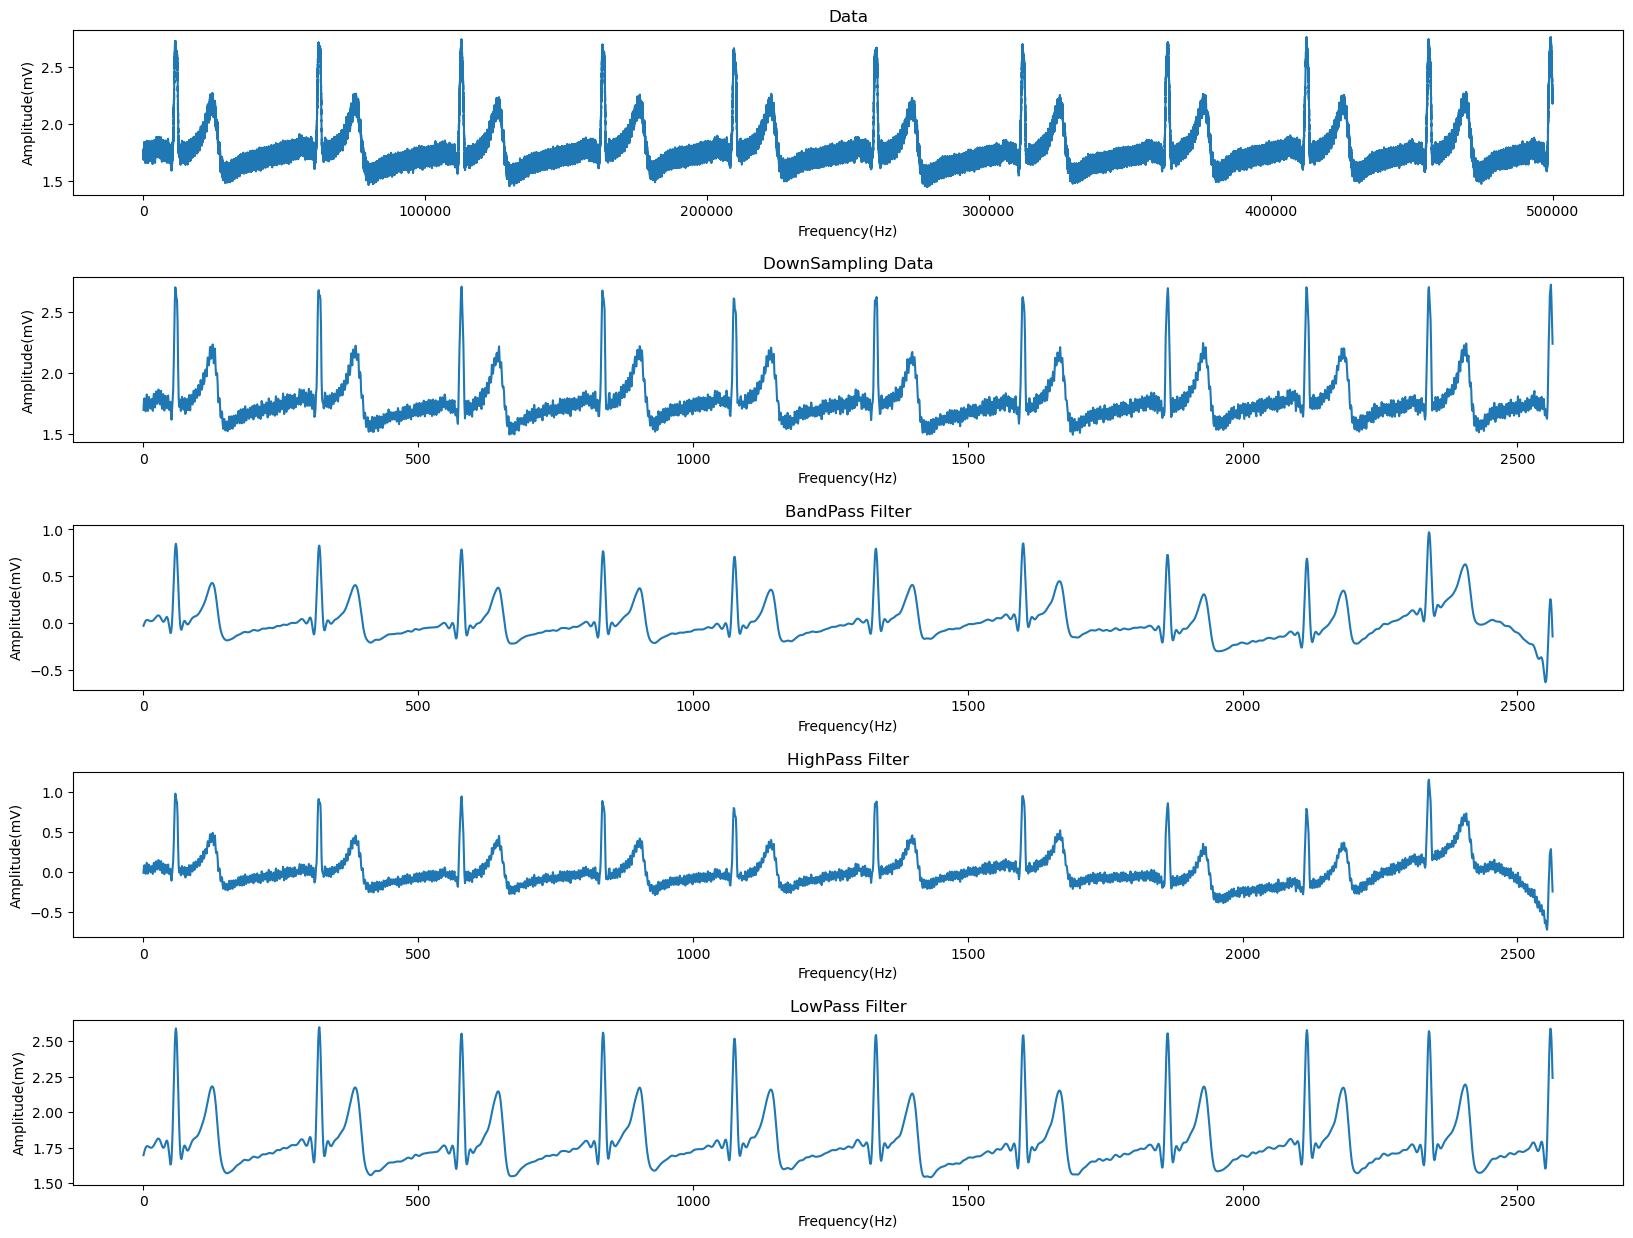

In [136]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(5, 1, 1)
plt.title('Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
origin[1].plot()


plt.subplot(5, 1, 2)
plt.title('DownSampling Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
down[1].plot()

plt.subplot(5, 1, 3)
plt.title('BandPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
bandpass['1'].plot()

plt.subplot(5, 1, 4)
plt.title('HighPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
highpass['1'].plot()

plt.subplot(5, 1, 5)
plt.title('LowPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
lowpass['1'].plot()
plt.show()